In [1]:
import os
os.chdir('../')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os

!nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]="7"

Fri May 19 22:08:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.105.01   Driver Version: 515.105.01   CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A5000    Off  | 00000000:1B:00.0 Off |                    0 |
| 30%   26C    P8    13W / 230W |   1433MiB / 23028MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A5000    Off  | 00000000:1C:00.0 Off |                  Off |
| 30%   

### Hyperparams

In [3]:
n_mels = 8
n_outputs = 61
n_frames = 400
sr = 24000
fps = 30
train_csv_files = ['/Storage/speech/face/rvh_visme_1_iPhone_30fps.csv',
                  '/Storage/speech/face/rvh_visme_2_iPhone_30fps.csv',
                  '/Storage/speech/face/rvh_visme_3_iPhone_30fps.csv']
train_wav_files = ['/Storage/speech/face/rvh_visme_1_iPhone.wav',
                 '/Storage/speech/face/rvh_visme_2_iPhone.wav',
                 '/Storage/speech/face/rvh_visme_3_iPhone.wav']

test_csv_files = ['/Storage/speech/face/rvh_visme_4_iPhone_30fps.csv']
test_wav_files = ['/Storage/speech/face/rvh_visme_4_iPhone.wav']

### Model

In [4]:
from model.model_reg import Model
from utils.util import *
from tensorboardX import SummaryWriter

step = 0
device = 'cuda:0'

# Model
model = Model(in_dim=n_mels, out_dim=n_outputs)
model = model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
print('done')

done


### Load

In [5]:
save_dir = '/data/scpark/save/lips/train05.19-5/'
!mkdir -p $save_dir
!ls -lt $save_dir

writer = SummaryWriter(save_dir)

if True:
    step, model, _, optimizer = load(save_dir, 7013, model, None, optimizer)

total 914840
-rw-rw-r-- 1 scpark scpark      6919  5월 19 22:08 events.out.tfevents.1684488479.GPUSVR01
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 22:07 save_7013
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 22:07 save_7000
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 21:36 save_6000
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 21:04 save_5000
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 20:33 save_4000
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 20:01 save_3000
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 19:30 save_2000
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 18:59 save_1000
-rw-rw-r-- 1 scpark scpark 104086195  5월 19 18:28 save_0
loaded /data/scpark/save/lips/train05.19-5/save_7013


In [6]:
import torch
from data.dataset import LipsDataset, Collate

dataset = LipsDataset(train_wav_files, train_csv_files, n_frames, n_mels=n_mels, sr=sr, fps=fps, perturb=True)
print('train dataset :', len(dataset))
train_loader = torch.utils.data.DataLoader(dataset, num_workers=1, shuffle=True, batch_size=8, 
                                           collate_fn=Collate(n_frames, n_mels))
print(train_loader)

dataset = LipsDataset(test_wav_files, test_csv_files, n_frames, n_mels=n_mels, sr=sr, fps=fps, perturb=False)
print('test dataset :', len(dataset))
test_loader = torch.utils.data.DataLoader(dataset, num_workers=1, shuffle=True, batch_size=8,
                                           collate_fn=Collate(n_frames, n_mels))
print(test_loader)

train dataset : 22042
test dataset : 7725


test : 0 0.02451171912252903
test : 1 0.025375839322805405
test : 2 0.024938104674220085
test : 3 0.022339070215821266
test : 4 0.023576829582452774
test : 5 0.024025501683354378
test : 6 0.024463186040520668
test : 7 0.023722078651189804
test : 8 0.024694478139281273
test : 9 0.024677053093910217
test_loss : 0.02423238568007946


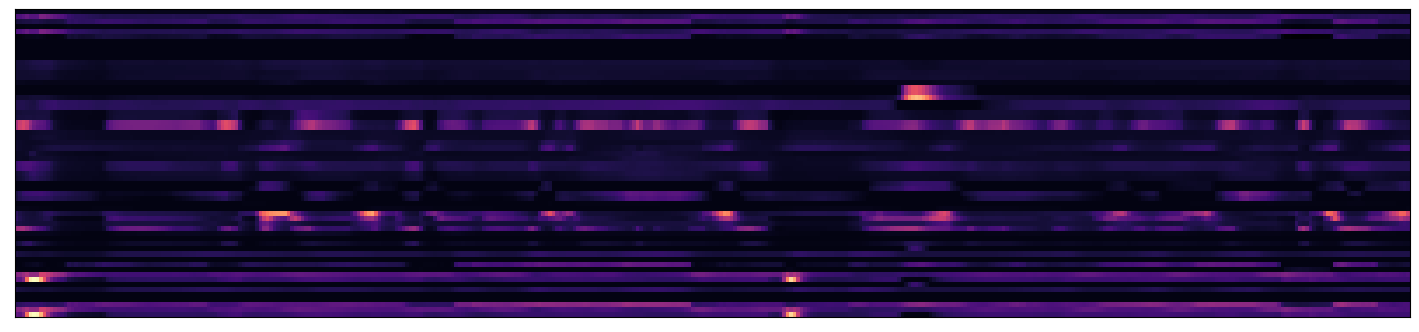

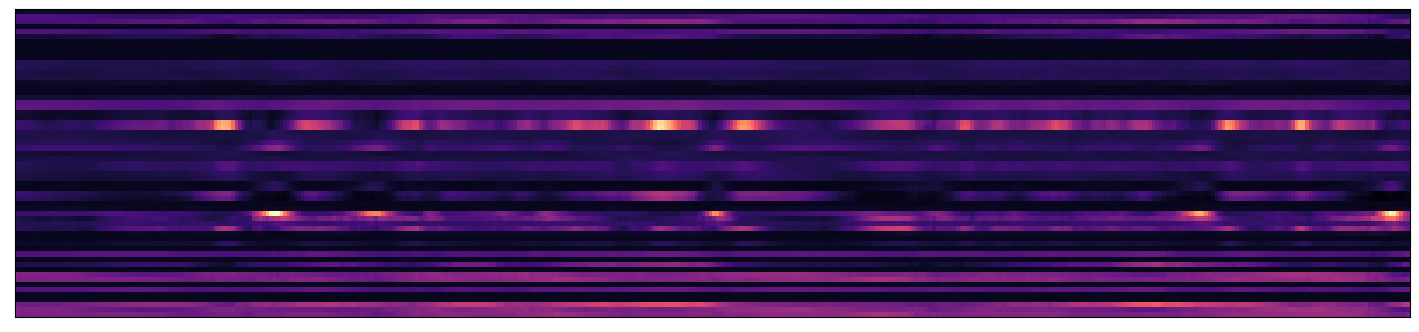

7701
loss 0.015165038406848907
7701 0.015165038406848907
7702
loss 0.015148010104894638
7702 0.015148010104894638
7703
loss 0.015618113800883293
7703 0.015618113800883293
7704
loss 0.014908992685377598
7704 0.014908992685377598
7705
loss 0.016064316034317017
7705 0.016064316034317017
7706
loss 0.014458253979682922
7706 0.014458253979682922
7707
loss 0.015201838687062263
7707 0.015201838687062263
7708
loss 0.014382580295205116
7708 0.014382580295205116
7709
loss 0.01541356835514307
7709 0.01541356835514307
7710
loss 0.015057006850838661
7710 0.015057006850838661
7711
loss 0.014895417727530003
7711 0.014895417727530003
7712
loss 0.016110900789499283
7712 0.016110900789499283
7713
loss 0.014585981145501137
7713 0.014585981145501137
7714
loss 0.01564757712185383
7714 0.01564757712185383
7715
loss 0.014204186387360096
7715 0.014204186387360096
7716
loss 0.015350064262747765
7716 0.015350064262747765
7717
loss 0.016108596697449684
7717 0.016108596697449684
7718
loss 0.017049361020326614
7718

In [ ]:
from IPython import display
import librosa.display
import matplotlib.pyplot as plt

isnan = False
while True:
    if isnan:
        break
    for batch in train_loader:
        inputs = batch['inputs'].transpose(1, 2).to(device)
        targets = batch['outputs'].transpose(1, 2).to(device)
        
        model.train()
        model.zero_grad()
        outputs = model(inputs, targets)
        
        print(step)
        loss = 0
        for key in outputs.keys():
            if 'loss' in key:
                loss += outputs[key]
                print(key, outputs[key].item())
        if torch.isnan(loss):
            isnan = True
            break
        loss.backward()
        optimizer.step()
        print(step, loss.item())
        
        if step % 100 == 0:
            writer.add_scalar('train_loss', loss.item(), step)
        
        if step % 100 == 0:
            display.clear_output()
            
            losses = []
            for i, batch in enumerate(test_loader):
                if i >= 10:
                    break
                    
                inputs = batch['inputs'].transpose(1, 2).to(device)
                targets = batch['outputs'].transpose(1, 2).to(device)

                model.eval()
                with torch.no_grad():
                    outputs = model(inputs, targets)
                    
                loss = 0
                for key in outputs.keys():
                    if 'loss' in key:
                        loss += outputs[key]
                print('test :', i, loss.item())
                losses.append(loss)        
            
            test_loss = torch.stack(losses).mean().item()
            print('test_loss :', test_loss)
            writer.add_scalar('test_loss', test_loss, step)
            
            plt.figure(figsize=[18, 4])
            librosa.display.specshow(targets[0].data.cpu().numpy(), cmap='magma')
            plt.show()

            plt.figure(figsize=[18, 4])
            librosa.display.specshow(outputs['y_pred'][0].data.cpu().numpy(), cmap='magma')
            plt.show()

        if step % 1000 == 0:
            save(save_dir, step, model, None, optimizer)
    
        step += 1

In [ ]:
save(save_dir, step, model, None, optimizer)